# Comparison Notebook

This notebook will compare a test screenshot of the Wikipedia and test how good OCR works for the following tools:

- EasyOCR
- PyTesseract
- ocrmac

## EasyOCR

In [1]:
import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext('wikipedia_test.png')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
%%timeit
result = reader.readtext('wikipedia_test.png')

1.24 s ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(570, 571, 4)


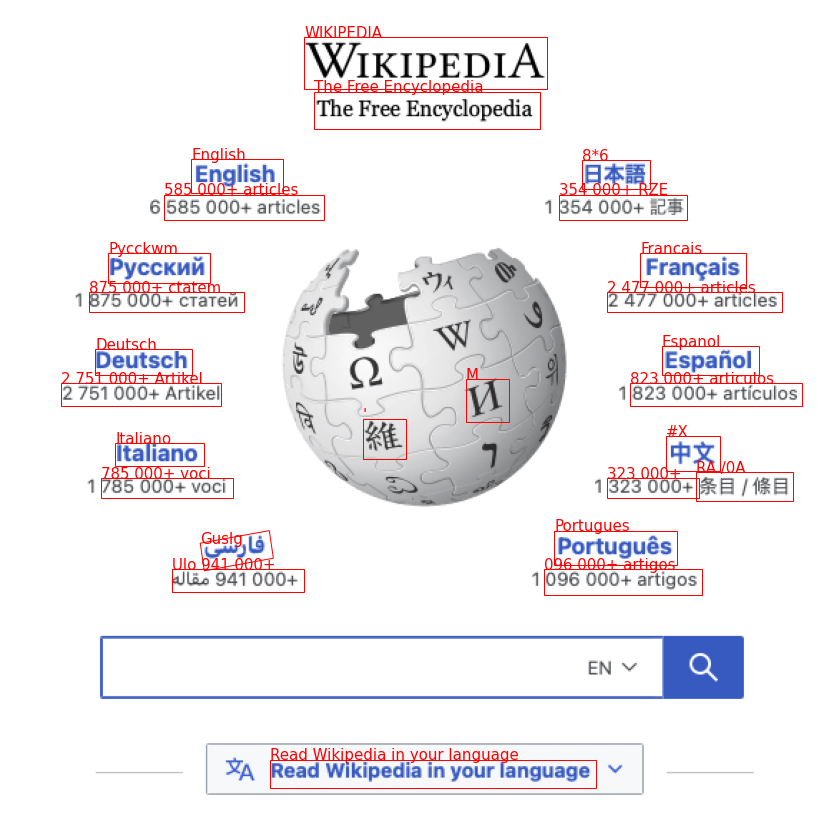

In [3]:
import matplotlib.pyplot as plt 

im = plt.imread('wikipedia_test.png')
print(im.shape)

fig = plt.figure(figsize=(15,15))

plt.imshow(im)

for _ in result:
    x = [n[0] for n in _[0]]
    y = [n[1] for n in _[0]]
    plt.fill(x,y, facecolor='none', edgecolor='red')
    plt.text(x[0],y[0], _[1], color='red', fontsize=15)

plt.axis('off')
plt.savefig('output_easyocr.png')
plt.show()

In [4]:
reader = easyocr.Reader(['ru']) # this needs to run only once to load the model into memory
result = reader.readtext('wikipedia_test.png')
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[207, 21], [377, 21], [377, 57], [207, 57]],
  '[к-РЕЭ-А',
  0.1501707388659556),
 ([[214, 59], [372, 59], [372, 85], [214, 85]],
  'Те гее Еп-ус рефа',
  0.48155943624074354),
 ([[128, 106], [192, 106], [192, 130], [128, 130]],
  'Еп:з}',
  0.4931313245579216),
 ([[401, 107], [449, 107], [449, 127], [401, 127]],
  'НАша',
  0.09750906378030777),
 ([[109, 131], [221, 131], [221, 149], [109, 149]],
  '585 000+ аг--е',
  0.5561461008741334),
 ([[385, 131], [475, 131], [475, 149], [385, 149]],
  '354 000+ яЕ=',
  0.6624607197410154),
 ([[70, 172], [141, 172], [141, 193], [70, 193]],
  'Русский',
  0.9999923853785443),
 ([[442, 172], [516, 172], [516, 196], [442, 196]],
  ' гап-а$',
  0.19804385327166332),
 ([[57, 199], [165, 199], [165, 213], [57, 213]],
  '875 000+ статей',
  0.9213651708607431),
 ([[419, 199], [541, 199], [541, 213], [419, 213]],
  "2 477 000+ ап'-ез",
  0.2471877784117859),
 ([[61, 239], [129, 239], [129, 257], [61, 257]],
  '[еш-$с}',
  0.11783439216818022),
 ([[45

## 2. Tesseract

In [5]:
from PIL import Image
import pytesseract

result = pytesseract.pytesseract.image_to_data(Image.open('wikipedia_test.png'))


In [6]:
%%timeit
result = pytesseract.pytesseract.image_to_data(Image.open('wikipedia_test.png'))

284 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
print(result)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	571	570	-1	
2	1	1	0	0	0	208	25	168	25	-1	
3	1	1	1	0	0	208	25	168	25	-1	
4	1	1	1	1	0	208	25	168	25	-1	
5	1	1	1	1	1	208	25	168	25	75.300156	WIKIPEDIA
2	1	2	0	0	0	216	65	151	16	-1	
3	1	2	1	0	0	216	65	151	16	-1	
4	1	2	1	1	0	216	65	151	16	-1	
5	1	2	1	1	1	216	65	26	12	89.134109	‘The
5	1	2	1	1	2	246	66	29	11	93.340363	Free
5	1	2	1	1	3	279	65	88	16	96.194649	Encyclopedia
2	1	3	0	0	0	100	101	373	45	-1	
3	1	3	1	0	0	100	101	373	45	-1	
4	1	3	1	1	0	132	101	314	32	-1	
5	1	3	1	1	1	132	101	55	32	96.924599	English
5	1	3	1	1	2	404	110	42	14	52.568787	BAR
4	1	3	1	2	0	100	134	373	12	-1	
5	1	3	1	2	1	100	135	7	10	92.915199	6
5	1	3	1	2	2	112	135	23	10	92.915199	585
5	1	3	1	2	3	139	135	32	10	94.830559	000+
5	1	3	1	2	4	175	135	44	10	94.646553	articles
5	1	3	1	2	5	376	135	33	10	83.194809	1354
5	1	3	1	2	6	414	135	31	10	93.123138	000+
5	1	3	1	2	7	450	134	23	12	0.000000	5oe
2	1	4	0	0	0	48	175	113	35	-1	
3	1	4	1	0	0	4

In [8]:
import pandas as pd
from io import StringIO
result_df = pd.read_csv(StringIO(result), sep='\t')
display(result_df)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,571,570,-1.000000,NaN
1,2,1,1,0,0,0,208,25,168,25,-1.000000,NaN
2,3,1,1,1,0,0,208,25,168,25,-1.000000,NaN
3,4,1,1,1,1,0,208,25,168,25,-1.000000,NaN
4,5,1,1,1,1,1,208,25,168,25,75.300156,WIKIPEDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
124,5,1,17,1,1,1,249,528,20,14,95.000000,
125,2,1,18,0,0,0,140,550,304,1,-1.000000,NaN
126,3,1,18,1,0,0,140,550,304,1,-1.000000,NaN
127,4,1,18,1,1,0,140,550,304,1,-1.000000,NaN


(570, 571, 4)


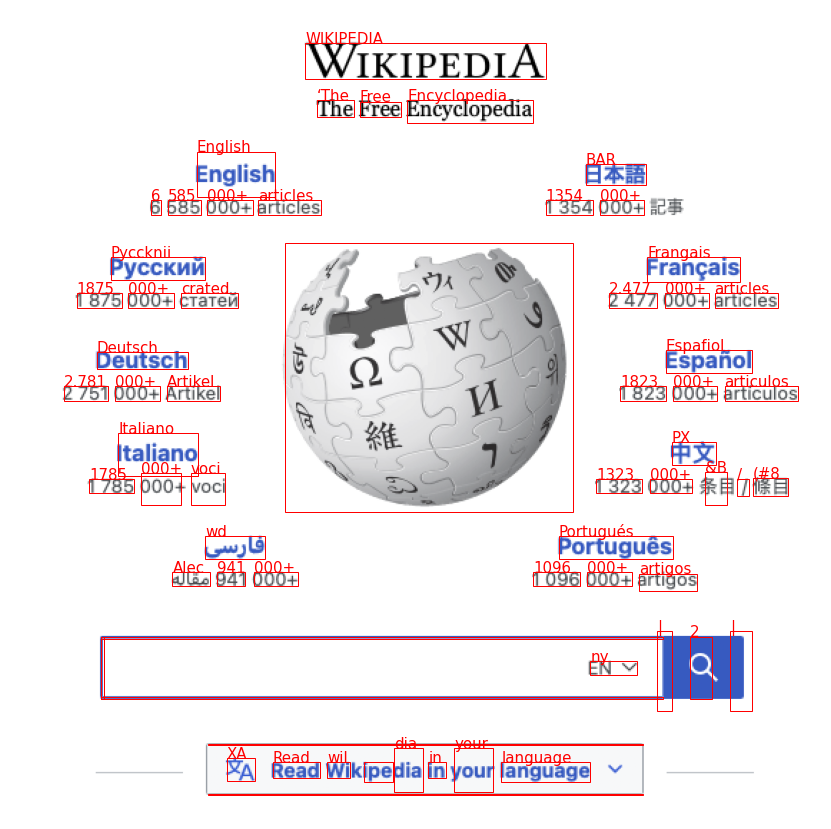

In [9]:
import matplotlib.pyplot as plt 

im = plt.imread('wikipedia_test.png')
print(im.shape)

fig = plt.figure(figsize=(15,15))

plt.imshow(im)

for i in range(len(result_df)):
    row = result_df.iloc[i]
    if row['conf'] > 0:
        x = [row['left'], row['left']+row['width'], row['left']+row['width'], row['left'], row['left']]
        y = [row['top'], row['top'], row['top']+row['height'], row['top']+row['height'], row['top']]
        plt.fill(x,y, facecolor='none', edgecolor='red')
        plt.text(x[0],y[0], row['text'], color='red', fontsize=15)

plt.axis('off')
plt.savefig('output_pytesseract.png')
plt.show()

## OCRMAC

In [10]:
from ocrmac import ocrmac

In [11]:
%%timeit 
annotations = ocrmac.OCR('wikipedia_test.png').recognize()

95.8 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
from ocrmac import ocrmac
annotations = ocrmac.OCR('wikipedia_test.png').recognize()
print(annotations)

[('WIKIPEDIA', 0.5, [0.3629201253255208, 0.910361484707338, 0.30281183454725474, 0.04670013973642184]), ('The Free Encyclopedia', 1.0, [0.3776041682700163, 0.8577661432809773, 0.2743055539522059, 0.031413612390924994]), ('English', 1.0, [0.22883804639180502, 0.7780029137097104, 0.10055181715223524, 0.029768685811893292]), ('6 585 000+ articles', 1.0, [0.17447916668216765, 0.7425828970518573, 0.2135416664775546, 0.022687609056345148]), ('845', 0.30000001192092896, [0.7050324016147189, 0.7806914830499087, 0.08343235651652026, 0.02685377776726794]), ('1 354 000+ 523', 0.5, [0.6571180555555556, 0.7425828970543127, 0.17361111093750003, 0.02268760905388978]), ('PyccKuM', 0.30000001192092896, [0.12590102354685465, 0.6659306764186572, 0.12016787793901232, 0.027914316866410438]), ('1 875 000+ CTATen', 0.5, [0.08246527778397818, 0.629144851675081, 0.2031249998201885, 0.020942408359822973]), ('Français', 0.5, [0.7775196499294705, 0.6621201067486775, 0.12282530466715491, 0.03177495027711874]), ('2

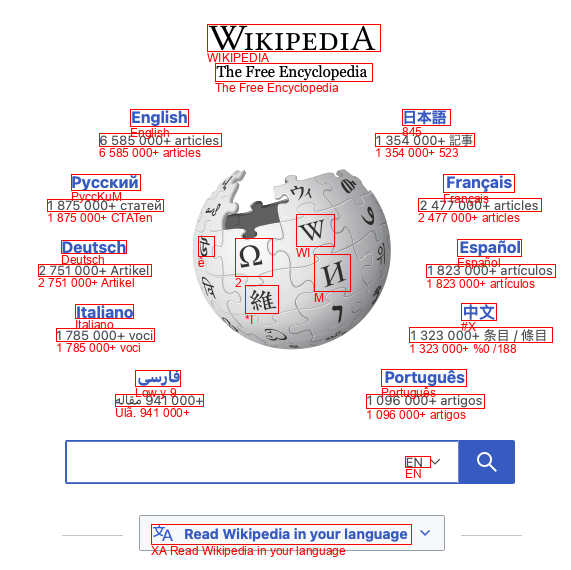

In [13]:
img = ocrmac.OCR('wikipedia_test.png',recognition_level='accurate').annotate_PIL()

img.save('output_ocrmac.png')
img